In [1]:
#k=7,5,9

In [76]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Data Creation

In [77]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


We have created two normal distributions with same covariance but different mean 

## Plotting the created Data 

Notice the 2 unique clusters being formed 

In [78]:
# 2 features for each distribution. 2 distribution

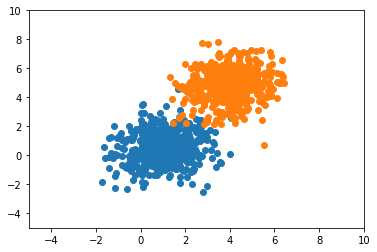

In [79]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

 Let us now represent it in tabular way dist_01 : gets label 1 . 

In [80]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print(data.shape)

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print(data.mean(axis=0))

(1000, 3)
[ 2.48797179  2.72345196  0.5       ]


In [81]:
np.random.shuffle(data)
print(data[:10])

[[ 2.44775784  0.87145738  0.        ]
 [ 5.41363372  7.27292432  1.        ]
 [ 2.3587854   0.38353384  0.        ]
 [ 0.61662803  0.24822857  0.        ]
 [ 1.71001976  4.73496136  1.        ]
 [-0.44730388  1.16280772  0.        ]
 [ 0.24929682 -0.35220495  0.        ]
 [ 1.75259291  0.67756782  0.        ]
 [ 3.08431583  5.75367913  1.        ]
 [ 4.42727124  4.08320753  1.        ]]


In [82]:
a = np.asarray([[1,2,3],[5,5,5]])

In [8]:
a

array([[1, 2, 3],
       [5, 5, 5]])

In [9]:
np.square(a-b)

NameError: name 'b' is not defined

In [10]:
np.sort(np.sqrt(np.sum(np.square(a-b),axis=1)))

NameError: name 'b' is not defined

In [11]:
a = np.asarray([1,2,3],[5,5,5])
b = np.asarray([3,4,5])

np.sqrt(np.sum(np.square(a-b),axis=0))

TypeError: data type not understood

In [54]:
import pandas as pd
s = pd.Series([1,1,1,2,2,2,2])

r = s.value_counts().index

In [75]:
s.value_counts()

2    4
1    3
dtype: int64

In [56]:
r

Int64Index([2, 1], dtype='int64')

In [93]:
def distance(x1, x2):
    #TODO
    #np.sort(np.sqrt(np.sum(np.square(x1-x2),axis=0)))[:k]
    return np.sqrt(np.sum(np.square(x1-x2),axis=0))
def knn(X_train, y_train, xt, k=7):
    #TODO
    distances = []
    for i,each_x in enumerate(X_train):
        distances.append((distance(each_x,xt),y_train[i]))
    
    distances = sorted(distances)
    #print(distances)
    first_k = distances[:k]
    labels = pd.Series([e[1] for e in first_k])
    #print(labels)
    return labels.value_counts().index[0]

In [84]:
test_point = np.array([8, -4])

#De-comment the line below and check if it comes out as 0.0  
print(knn(data[:, :2], data[:, -1], test_point))

0.0


## Let us create train and test data now

In [85]:
np.random.shuffle(data)
split = int(0.75 * data.shape[0])
# print split
train_data_X = data[:split, :2]
train_data_y = data[:split, -1]
test_data_X = data[split:, :2]
test_data_y = data[split:, -1]

print(train_data_X.shape, train_data_y.shape)
print(test_data_X.shape, test_data_y.shape)

(750, 2) (750,)
(250, 2) (250,)


In [74]:
test_data_y[0]

1.0

In [96]:
def get_acc(kx):
    
    right  = 0
    t = test_data_X[:2]
    for i,each_x in enumerate(test_data_X):
        r = knn(train_data_X,train_data_y,each_x,kx)
        #print(int(r))
        if(r==test_data_y[i]):
            right+=1
    return ((right/len(test_data_y))*100)
print(get_acc(7))

99.2


You should get about 99 percent accuracy

Let us try different values of K 

In [97]:
for ix in range(2, 20):
    print ("k:", ix, "| Acc:", get_acc(ix))

k: 2 | Acc: 95.6
k: 3 | Acc: 99.6
k: 4 | Acc: 99.2
k: 5 | Acc: 99.6
k: 6 | Acc: 99.2
k: 7 | Acc: 99.2
k: 8 | Acc: 99.6
k: 9 | Acc: 100.0
k: 10 | Acc: 100.0
k: 11 | Acc: 100.0
k: 12 | Acc: 100.0
k: 13 | Acc: 100.0
k: 14 | Acc: 100.0
k: 15 | Acc: 100.0
k: 16 | Acc: 100.0
k: 17 | Acc: 100.0
k: 18 | Acc: 100.0
k: 19 | Acc: 100.0


## Now let us try real data : MNIST

In [99]:
import pandas as pd
import datetime

In [101]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
data = df.values[:2000]
print (data.shape)

(2000, 785)


In [103]:
split = int(0.8 * data.shape[0])

X_train = data[:split, 1:]
X_test = data[split:, 1:]

y_train = data[:split, 0]
y_test = data[split:, 0]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1600, 784) (1600,)
(400, 784) (400,)


3


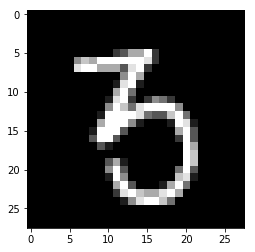

In [104]:
plt.figure(0)
plt.imshow(X_train[90].reshape((28, 28)), cmap='gray', interpolation='none')
print (y_train[90])
plt.show()

Now code get_acc and try different values of k 

In [108]:
def get_acc_mnist(kx):
    
    right  = 0
    
    for i,each_x in enumerate(X_test):
        r = knn(X_train,y_train,each_x,kx)
        #print(int(r))
        if(r==y_test[i]):
            right+=1
    return ((right/len(y_test))*100)
print(get_acc_mnist(13))

87.0
